In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

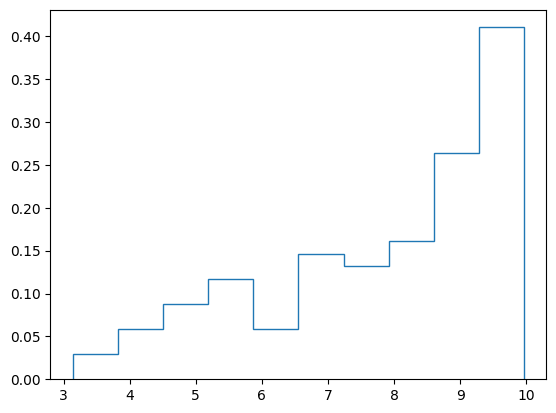

In [21]:
# generating initial points
N = int(1e2)
N_particles = N

a = 10 #sphere radius

I = lambda x: a*x**(1/3)
P = np.random.uniform(0,1,N)

r = I(P)
theta = np.sin(np.random.uniform(0, np.pi, N))
phi = np.random.uniform(0, 2*np.pi, N)

plt.hist(r, density = True, histtype = 'step');

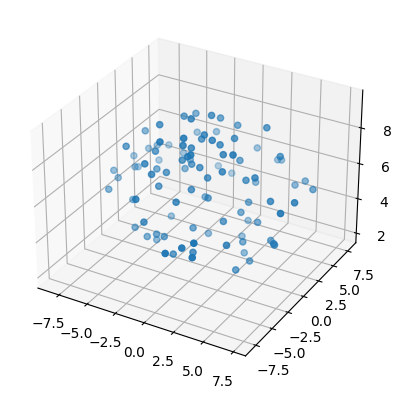

In [22]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(x,y,z);

In [23]:
# creating the input file
m = 1

with open ('in_data.txt', 'w+') as f:
    f.write(str(N) + '\n')
    f.write('0' + '\n')
    for i in range(N):
        f.write(f'{m} {x[i]} {y[i]} {z[i]} 0 0 0')
        f.write('\n')

## Data fetching and plots

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [27]:
lines = pd.read_csv('out_data.txt').to_numpy()

s = N_particles + 2 #step

t = lines[0::s].astype(float)
l = np.array([])
mxv = []

for i in tqdm(range(1, s-1)):
    l = np.append(l, lines[i::s])
    mxv = np.array([x.split(' ') for x in l.ravel()],dtype=float)

  0%|          | 0/100 [00:00<?, ?it/s]

In [28]:
properties = 7

mxv = mxv.reshape(len(t), N_particles, properties)

#print(a)
#print(N_particles)
print(t.shape)
print(mxv.shape)

print(f"\n3D array containing all the particles at all times",
      f"\n{np.size(mxv, 0)} is the iterations array", 
      f"\n{np.size(mxv, 1)} is the particles array", 
      f"\n{np.size(mxv, 2)} the property array of each particle")

(8, 1)
(8, 100, 7)

3D array containing all the particles at all times 
8 is the iterations array 
100 is the particles array 
7 the property array of each particle


In [29]:
m = mxv[0,:,0] #mass is conserved through time
x = mxv[:,:,1]
y = mxv[:,:,2]
z = mxv[:,:,3]
vx = mxv[:,:,4]
vy = mxv[:,:,5]
vz = mxv[:,:,6]

print(m.shape)
print(m)
print(x.shape)

(100,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
(8, 100)


In [70]:
r = np.sqrt(x**2 + y**2 + z**2)
r_ext = []

for r_i in r[0,:]:
    if r_i <= 11 and r_i>= 9:
        r_ext.append(r_i)

r_ext = np.array(r_ext)
print(r_ext)

[ 9.43587002  9.31780012  9.27985886  9.05384393  9.30538755  9.06662464
  9.14023512 10.59909262]


In [35]:
# simulation
from matplotlib import animation

def update(num):
    N = len(m)   #N_particles
    ax.clear()
    
    ax.scatter(x[num-1, :], y[num-1, :], z[num-1, :])        # Updating Point Location

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-a, a)
    ax.set_ylim(-a, a)
    ax.set_zlim(-a, a)

  0%|          | 0/8 [00:00<?, ?it/s]

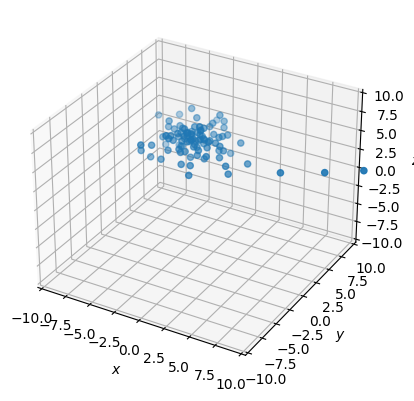

In [36]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = r"sphere.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

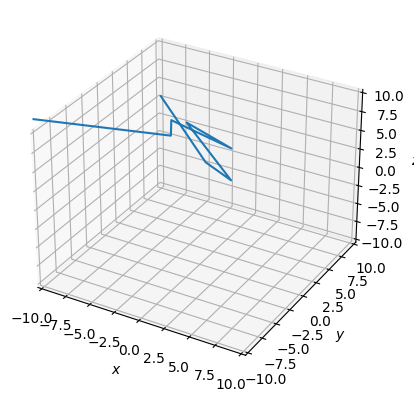

In [49]:
def update_single(num):
    global i
    
    N = len(m)   #N_particles
    ax.clear()
    
    ax.plot(x[:num+1, i], y[:num+1, i], z[:num+1, i])        # Updating Point Location

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-a, a)
    ax.set_ylim(-a, a)
    ax.set_zlim(-a, a)
    
    
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, update_single, interval=.0001,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = r"sphere_particle.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()

3.512407365520363


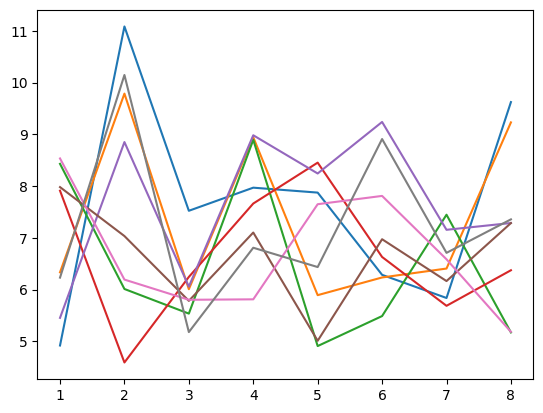

In [72]:
for i in range(len(r_ext)):
    plt.plot(t,r[:,i]);
rho = np.sum(m)/((4/3)*np.pi*a**3)
G = 1
t_ff = np.sqrt((3*np.pi)/(32*G*rho))
print(t_ff)